# Audio Processing
Author: [Ruben Nunez]


Inspired by [(Speech Processing for Machine Learning: Filter banks, Mel-Frequency Cepstral Coefficients (MFCCs) and What's In-Between)](https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html) 
post by Haytham M. Fayek written on April 21, 2016


This Notebook is a Playground for Audio Processing and Feature Extraction.
It helped me to understand the concepts and to test the code.

# Setup

To start/stop conda environment:


```bash 
conda activate ba-environment
conda deactivate
```

Install the following packages:

```bash 
pip install scipy
pip install numpy
pip install matplotlib
```


https://www.voiptroubleshooter.com/open_speech/american.html

Downloaded the following file: OSR_us_000_0019_8k.wav
It is a 8kHz, 16-bit, mono, PCM .wav file with a duration of 32 seconds.


### Plotting the Audio File
Amplitude vs Time

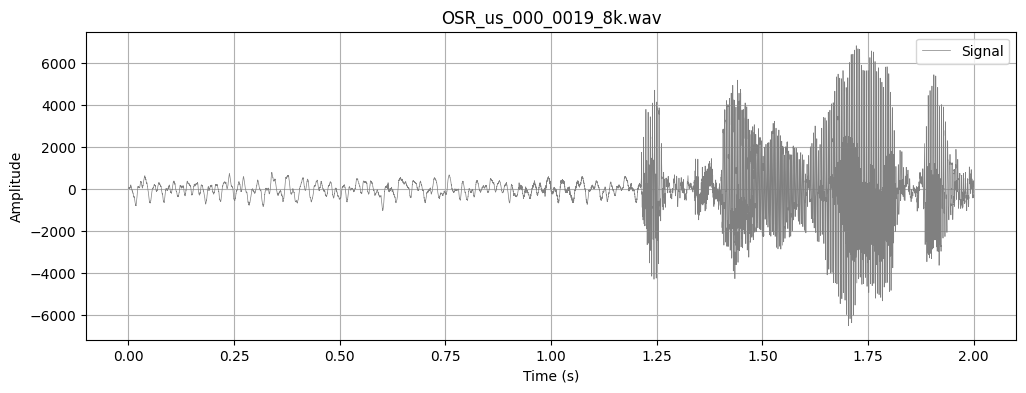

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

sample_rate, signal = wav.read('audio/OSR_us_000_0019_8k.wav')

# signal = signal[0:int(0.0025 * sample_rate)]  # Get the first 0.0025 seconds of the signal
signal = signal[0:int(2 * sample_rate)]         # Get the first 2 seconds of the signal

# Create an array of time values for the x-axis
time = np.linspace(0, len(signal) / sample_rate, num=len(signal))

plt.figure(figsize=(12, 4))
plt.title('OSR_us_000_0019_8k.wav')

# plot the signal as a continuous line (it's not)
plt.plot(time, signal, linestyle='-', color='gray', linewidth=0.5, label='Signal')

# plot the samples point wise
# plt.plot(time, signal, '.', color='red', markersize=5, label='Samples')

plt.xlabel('Time (s)') 
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Pre-Emphasis Filter

It is used to emphasize higher frequencies and discard some of the lower frequencies.
because higher frequencies have usually lower amplitudes than lower frequencies, 
therefore by emphasizing higher frequencies we can improve the signal-to-noise ratio (SNR).

For better understanding:
"Imagine the bass in a song, it is usually louder than the other instruments."

The formula for pre-emphasis is:

$$ y(t) = x(t) - \alpha x(t-1) $$




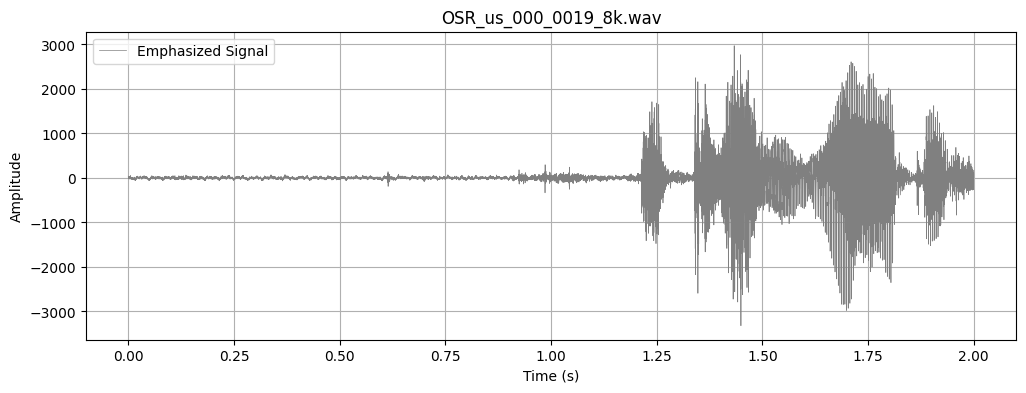

In [10]:
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

plt.figure(figsize=(12, 4))
plt.title('OSR_us_000_0019_8k.wav')

# plot the signal as a continuous line (it's not)
plt.plot(time, emphasized_signal, linestyle='-', color='gray', linewidth=0.5, label='Emphasized Signal')


plt.xlabel('Time (s)') 
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()